## Project Name : Census Income Project

# Dataset Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

### Description of fnlwgt (final weight) :

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

>A single cell estimate of the population 16+ for each state.

>Controls for Hispanic Origin by age and sex.

>Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. 

There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32560, 15)

In [6]:
# Missing Values
print(df.isna().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


<AxesSubplot:>

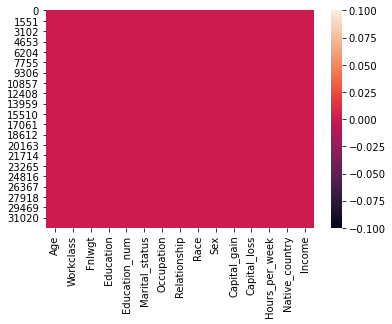

In [7]:
sns.heatmap(df.isnull())

### Exploratory Data Analysis:

### Univariate analysis:

Below, the data is represented by -

Countplot - which gives the counts of the data presented in the column.

Distplot - gives the distribution of the data

Boxplot - shows the outlier if there are present in the particular column.

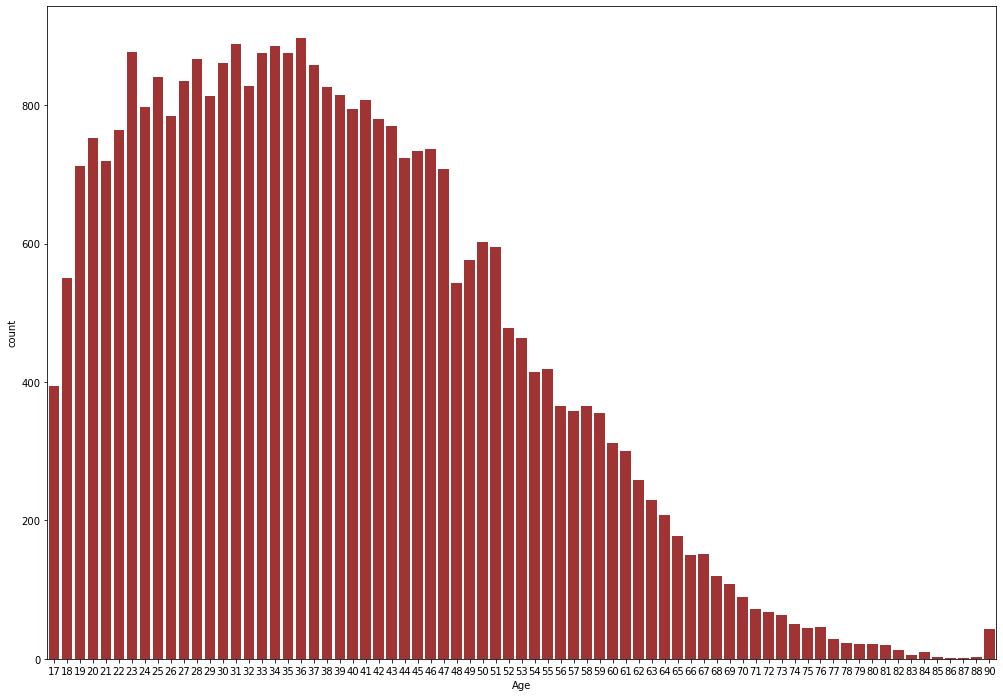

In [90]:
plt.figure(figsize=(17,12))
sns.countplot(x="Age", data=df, color="firebrick")
plt.show()

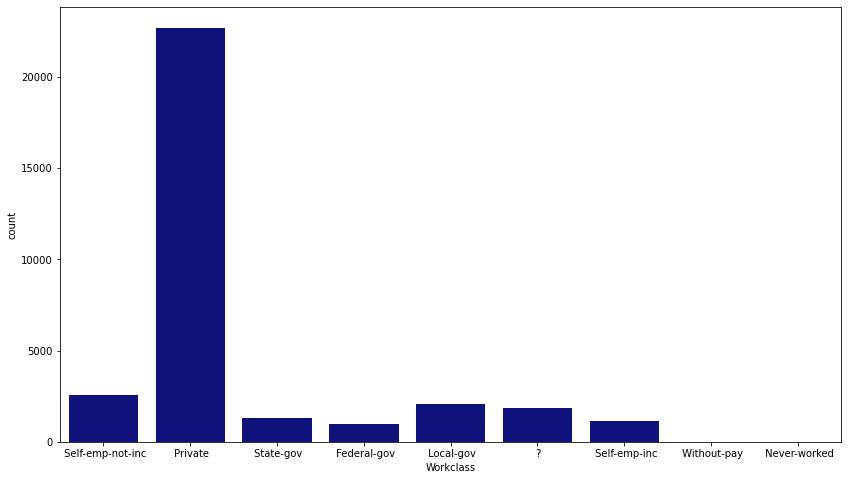

In [51]:
plt.figure(figsize=(14,8))
sns.countplot(x="Workclass", data=df, color="darkblue")
plt.show()

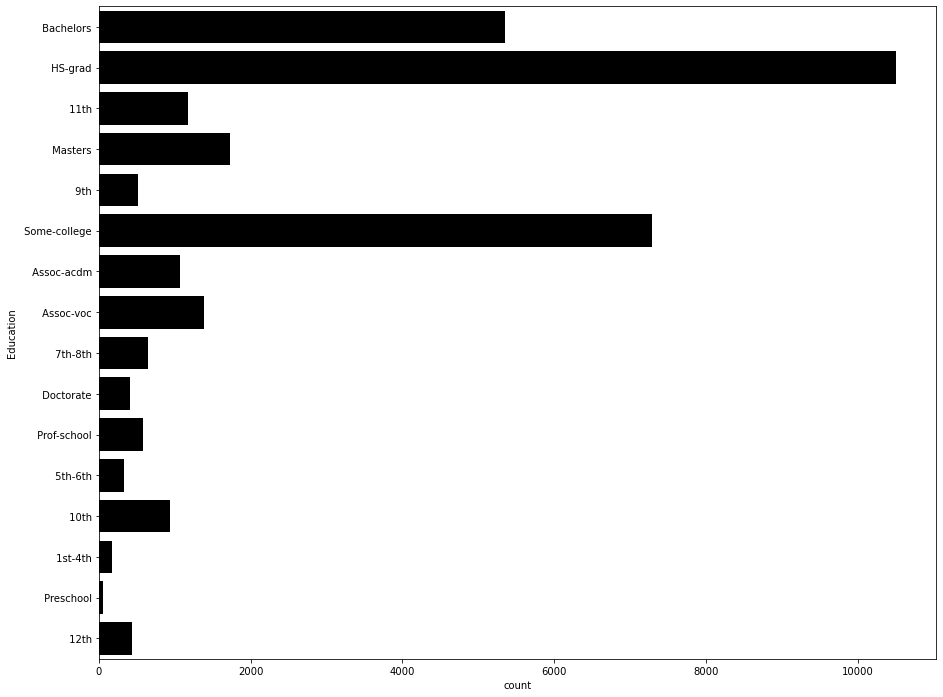

In [83]:
plt.figure(figsize=(15,12))
sns.countplot(y="Education", data=df, color="black")
plt.show()

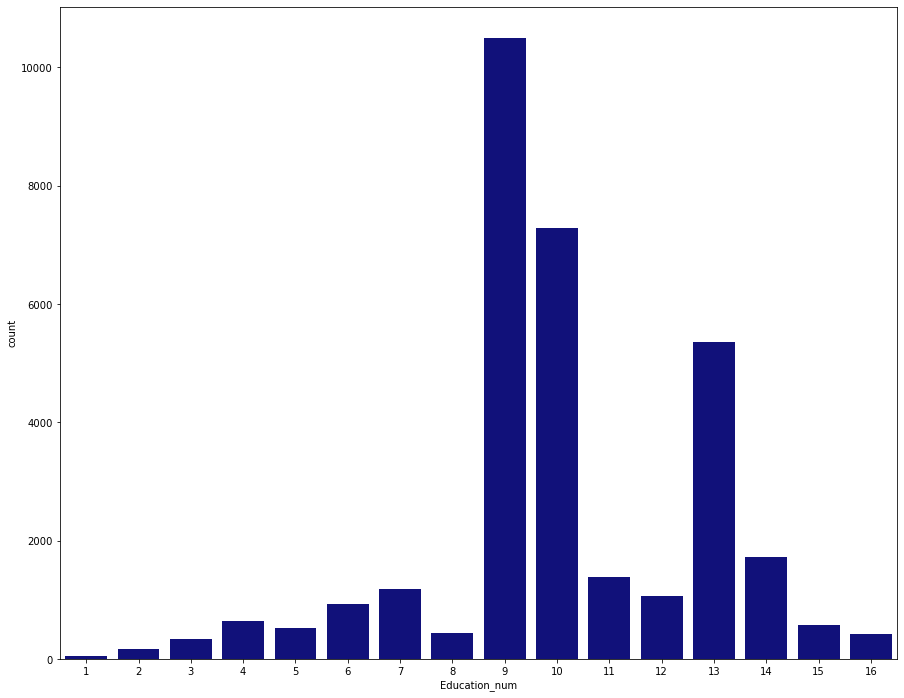

In [56]:
plt.figure(figsize=(15,12))
sns.countplot(x="Education_num", data=df, color="darkblue")
plt.show()

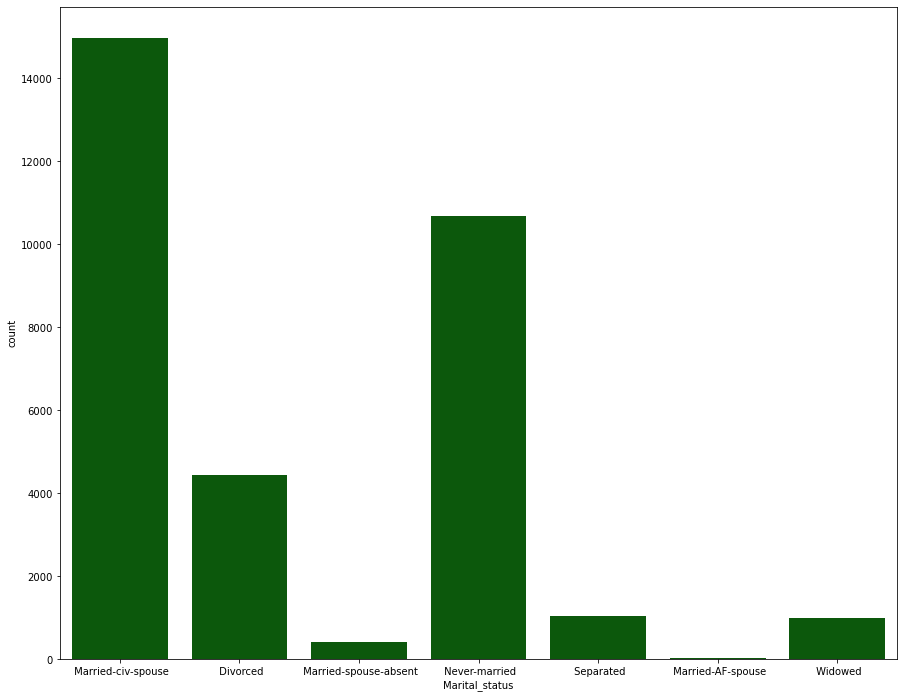

In [81]:
plt.figure(figsize=(15,12))
sns.countplot(x="Marital_status", data=df, color="darkgreen")
plt.show()

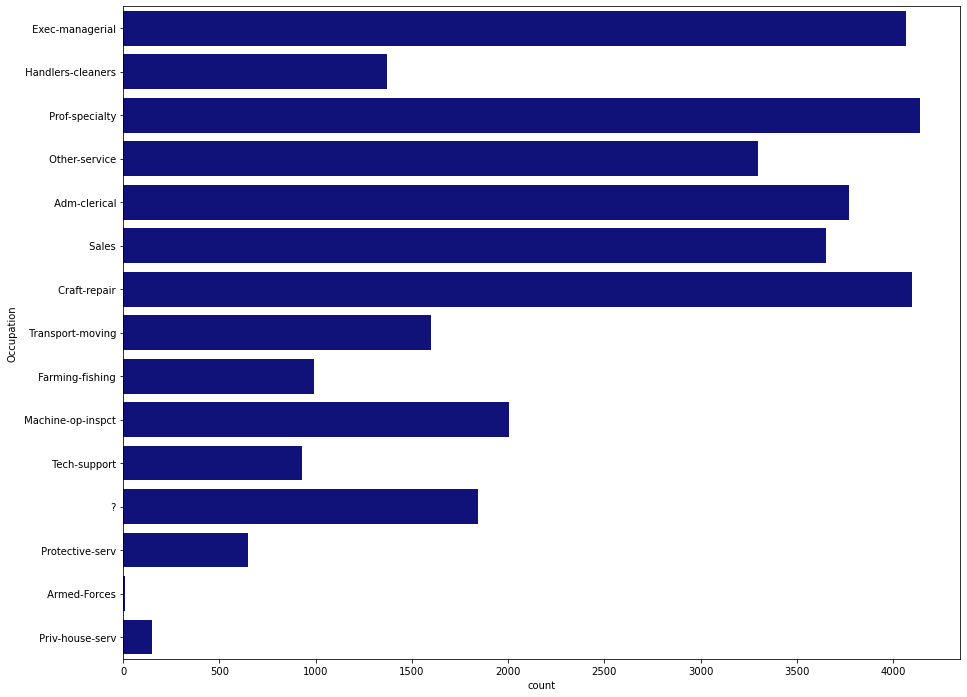

In [80]:
plt.figure(figsize=(15,12))
sns.countplot(y="Occupation", data=df, color="darkblue")
plt.show()

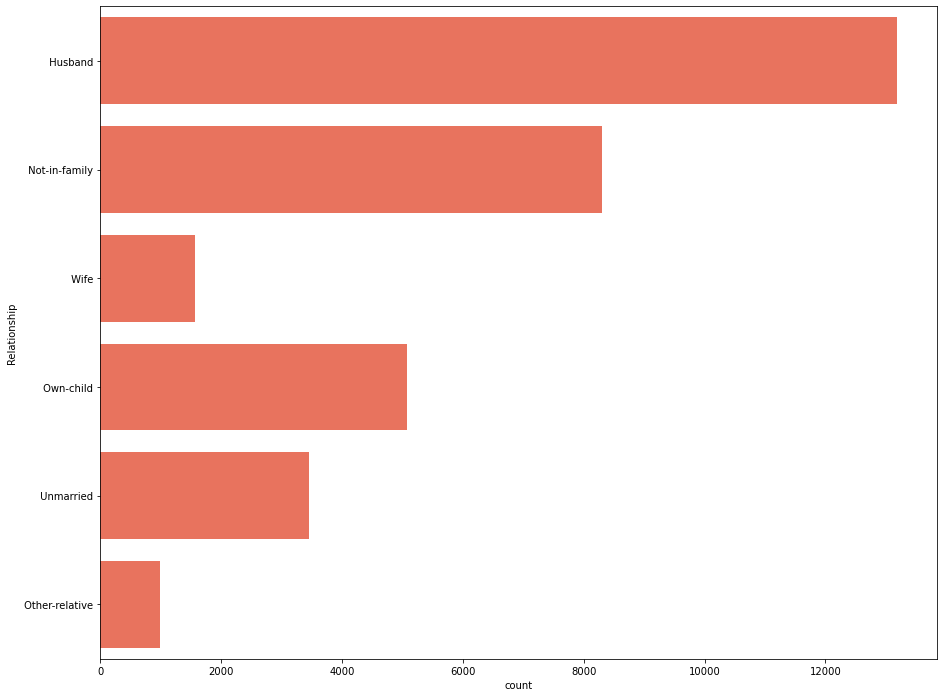

In [79]:
plt.figure(figsize=(15,12))
sns.countplot(y="Relationship", data=df, color="tomato")
plt.show()

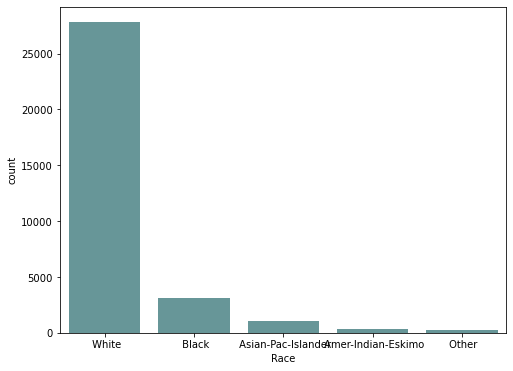

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(x="Race", data=df, color="cadetblue")
plt.show()

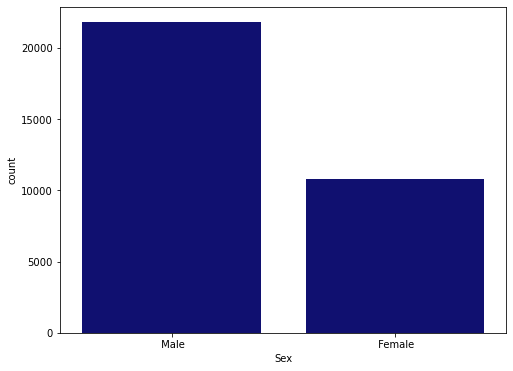

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(x="Sex", data=df, color="navy")
plt.show()

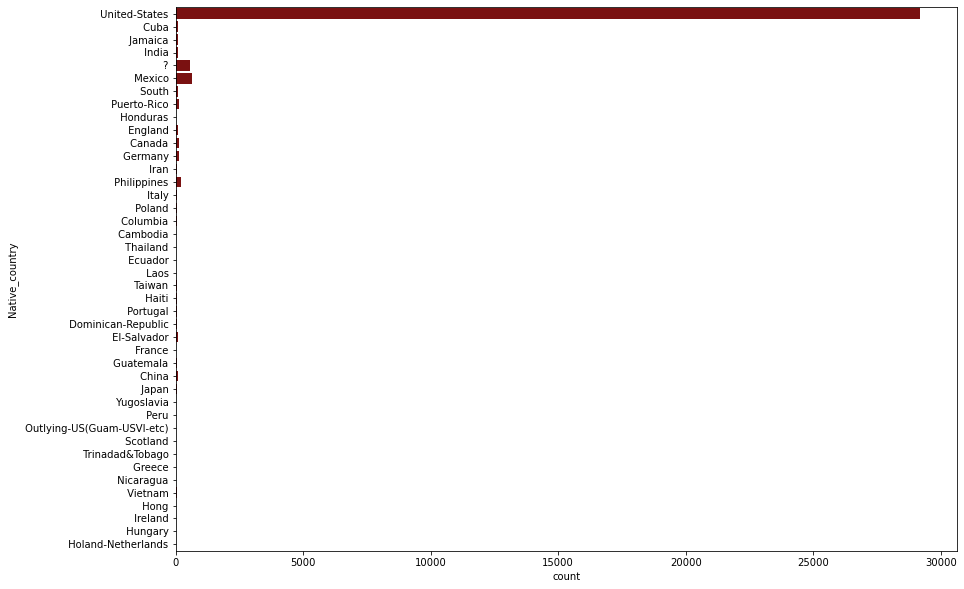

In [72]:
plt.figure(figsize=(14,10))
sns.countplot(y="Native_country", data=df, color="darkred")
plt.show()

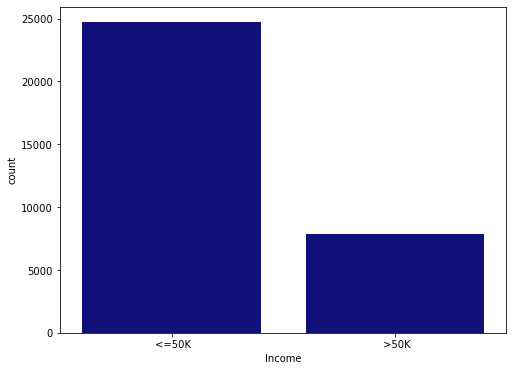

In [66]:
plt.figure(figsize=(8,6))
sns.countplot(x="Income", data=df, color="darkblue")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

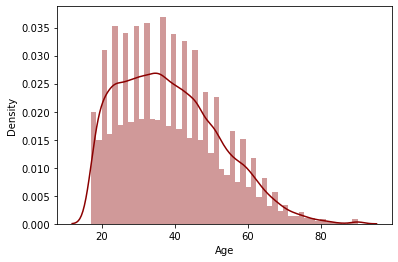

In [105]:
sns.distplot(df["Age"], color='darkred')

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

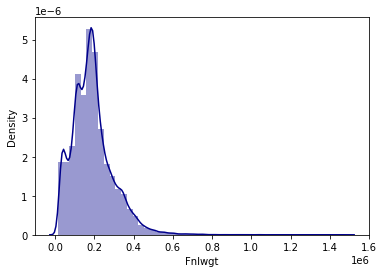

In [98]:
sns.distplot(df["Fnlwgt"], color='darkblue')

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

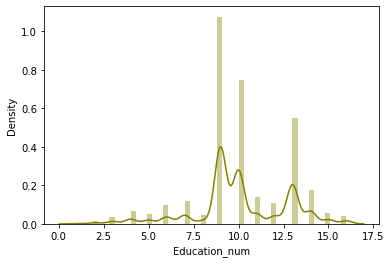

In [107]:
sns.distplot(df["Education_num"], color='olive')

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

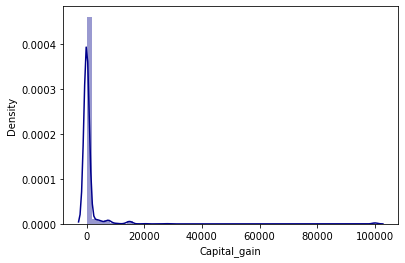

In [100]:
sns.distplot(df["Capital_gain"], color='darkblue')

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

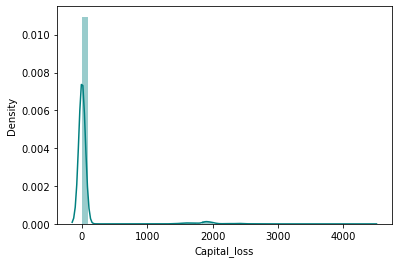

In [108]:
sns.distplot(df["Capital_loss"], color='teal')

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

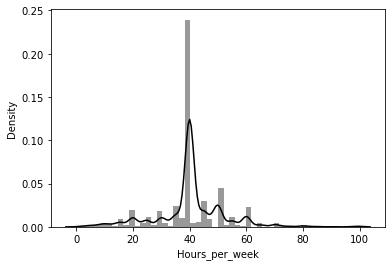

In [109]:
sns.distplot(df["Hours_per_week"], color='black')

### Bivariate analysis:

<AxesSubplot:xlabel='Age', ylabel='count'>

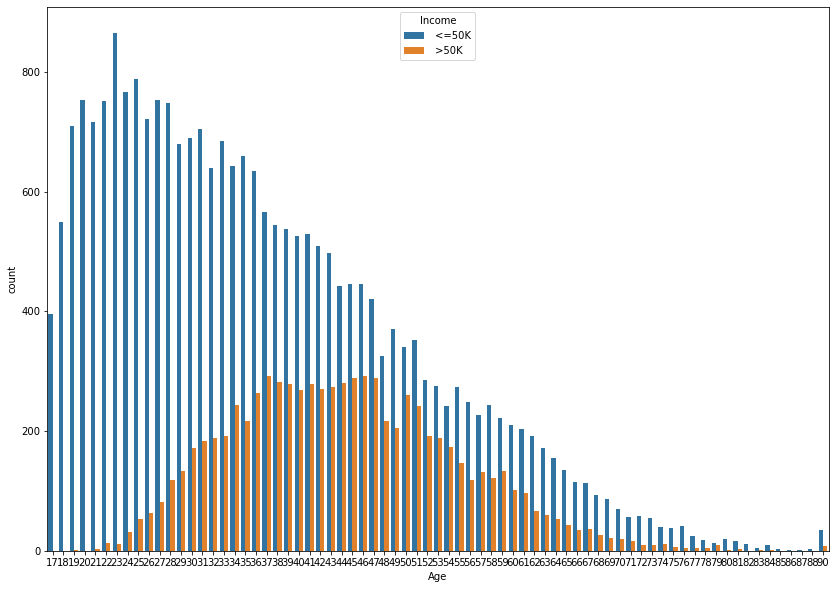

In [110]:
plt.subplots(figsize=(14,10))
sns.countplot(x='Age',hue='Income',data=df)

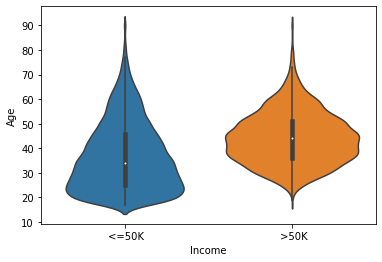

In [116]:
sns.violinplot(x = "Income", y = "Age", data = df)
plt.show()

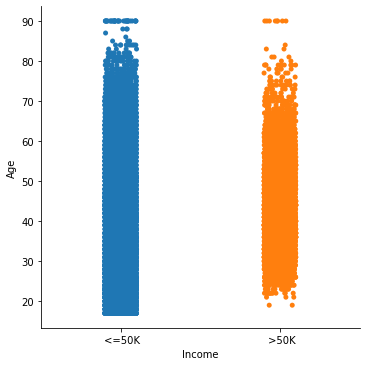

In [114]:
sns.catplot(x ="Income", y ="Age", data = df)
plt.show()

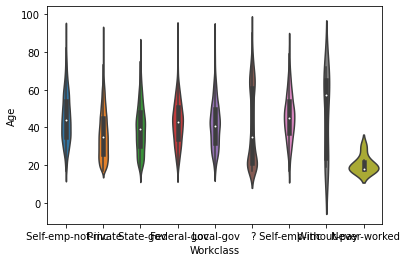

In [122]:
sns.violinplot(x = "Workclass", y = "Age", data = df)
plt.show()

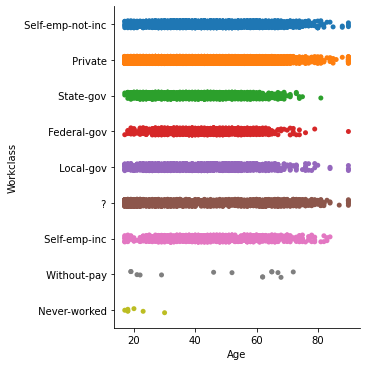

In [120]:
sns.catplot(x ="Age", y ="Workclass", data = df)
plt.show()

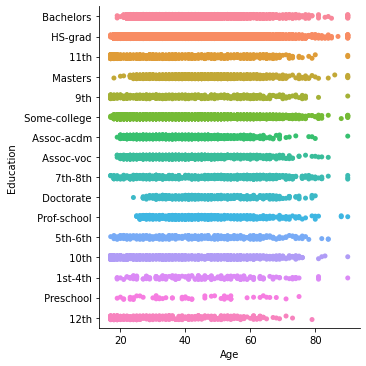

In [128]:
sns.catplot(x ="Age", y ="Education", data = df)
plt.show()

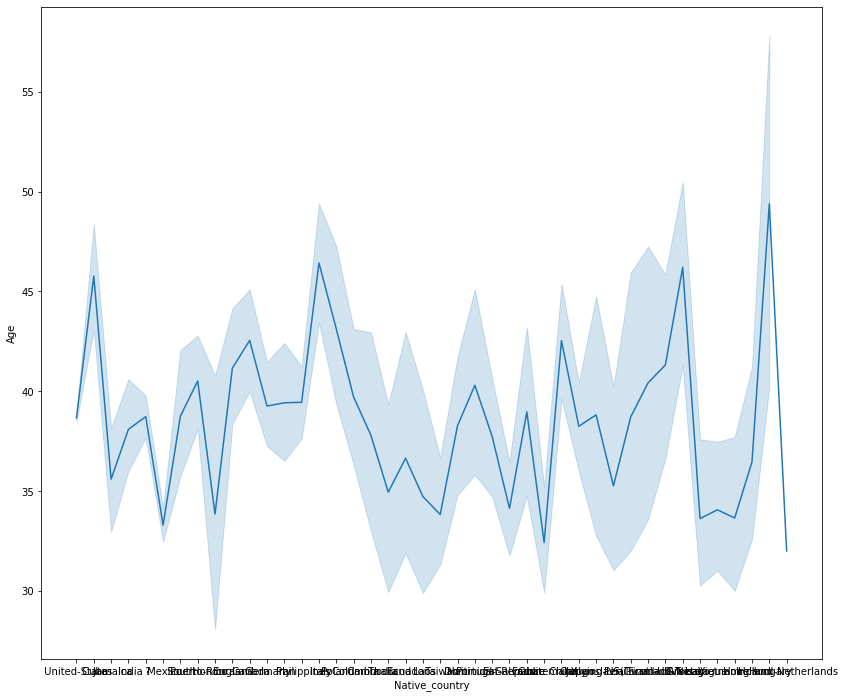

In [142]:
plt.figure(figsize=(14,12))
sns.lineplot(x ="Native_country", y ="Age", data = df)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

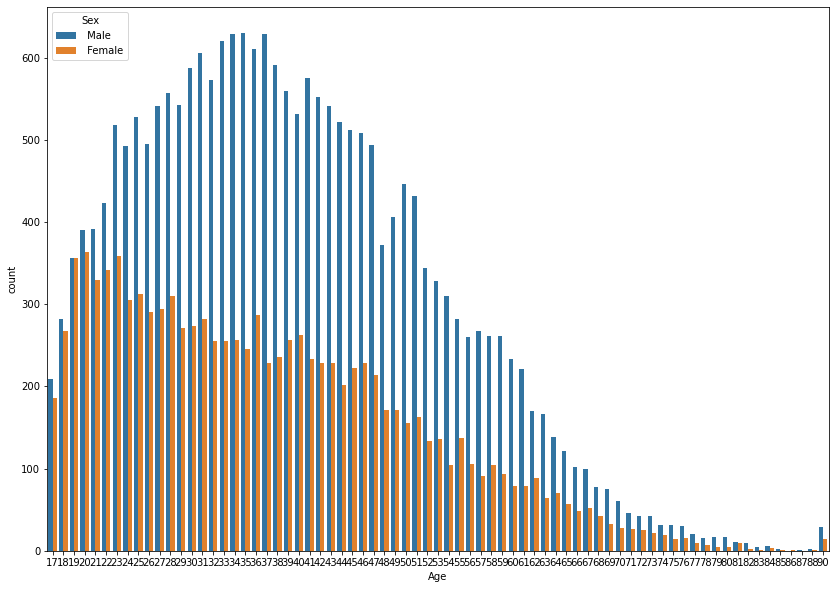

In [127]:
plt.subplots(figsize=(14,10))
sns.countplot(x='Age',hue='Sex',data=df)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

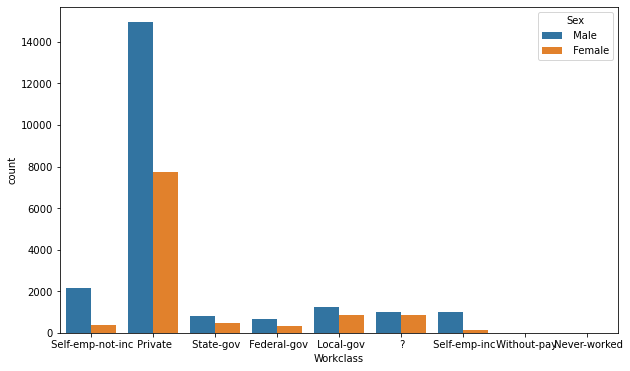

In [135]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Workclass',hue='Sex',data=df)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

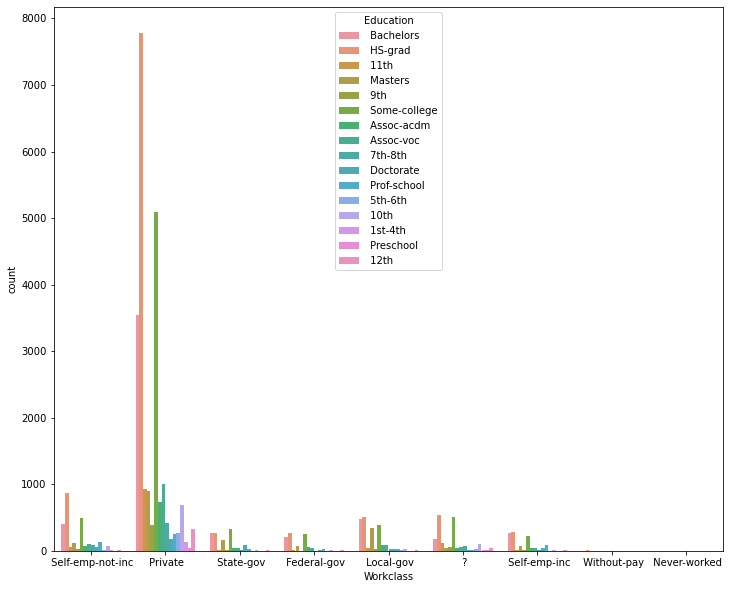

In [136]:
plt.subplots(figsize=(12,10))
sns.countplot(x='Workclass',hue='Education',data=df)

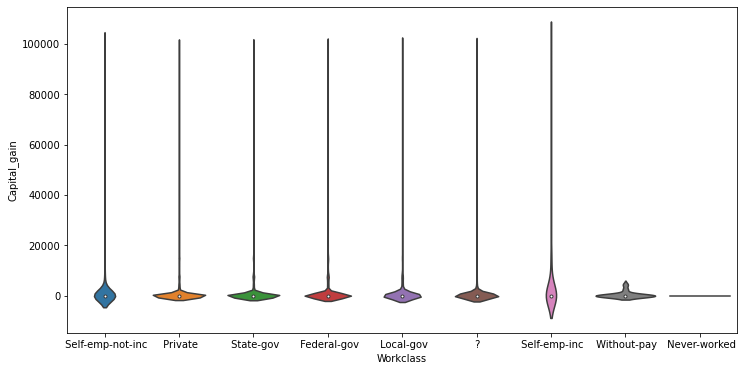

In [152]:
plt.subplots(figsize=(12,6))
sns.violinplot(x ='Workclass', y = 'Capital_gain', data = df)
plt.show()

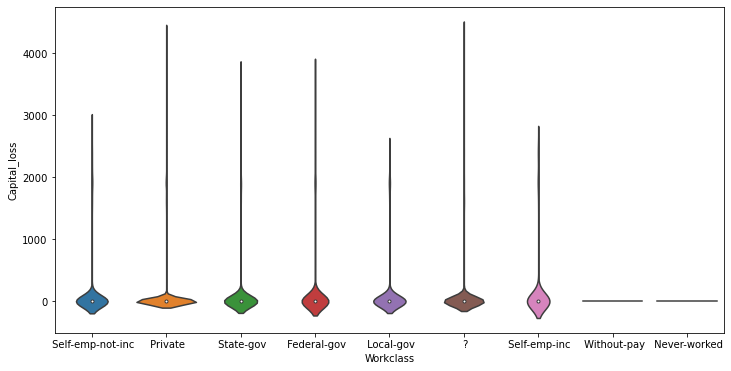

In [151]:
plt.subplots(figsize=(12,6))
sns.violinplot(x ='Workclass', y = 'Capital_loss', data = df)
plt.show()

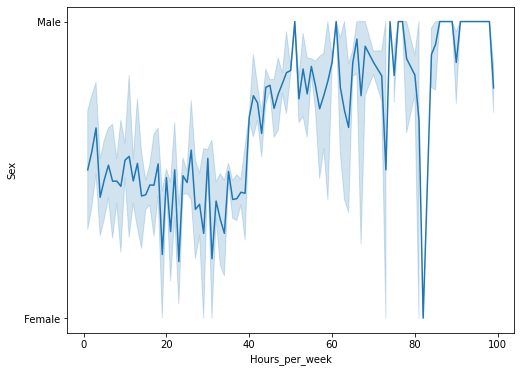

In [160]:
plt.figure(figsize=(8,6))
sns.lineplot(x ="Hours_per_week", y ="Sex", data = df)
plt.show()

<Figure size 864x432 with 0 Axes>

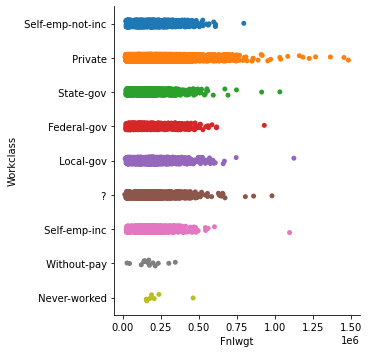

In [167]:
plt.figure(figsize=(12,6))
sns.catplot(x ="Fnlwgt", y ="Workclass", data = df)
plt.show()

### Multivariate analysis:

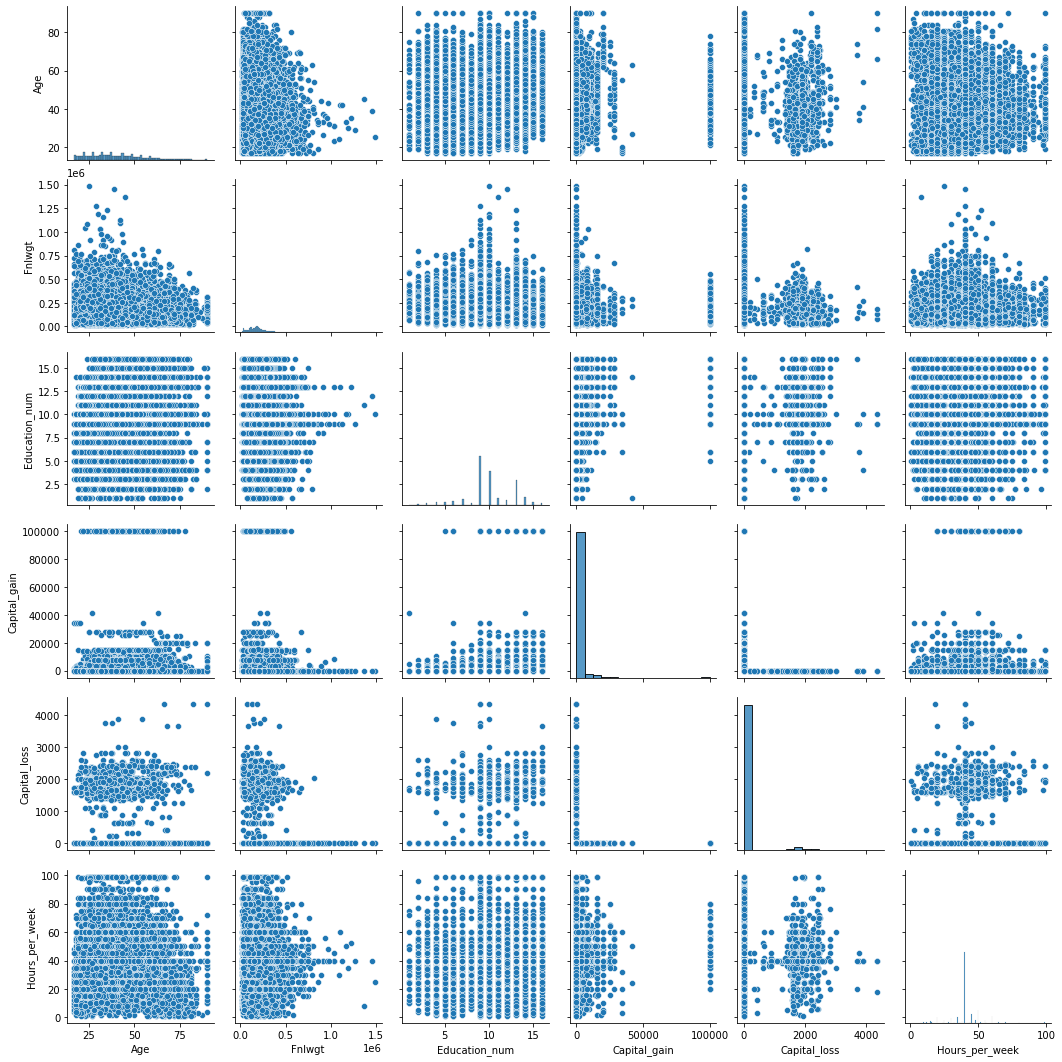

In [168]:
sns.pairplot(df)

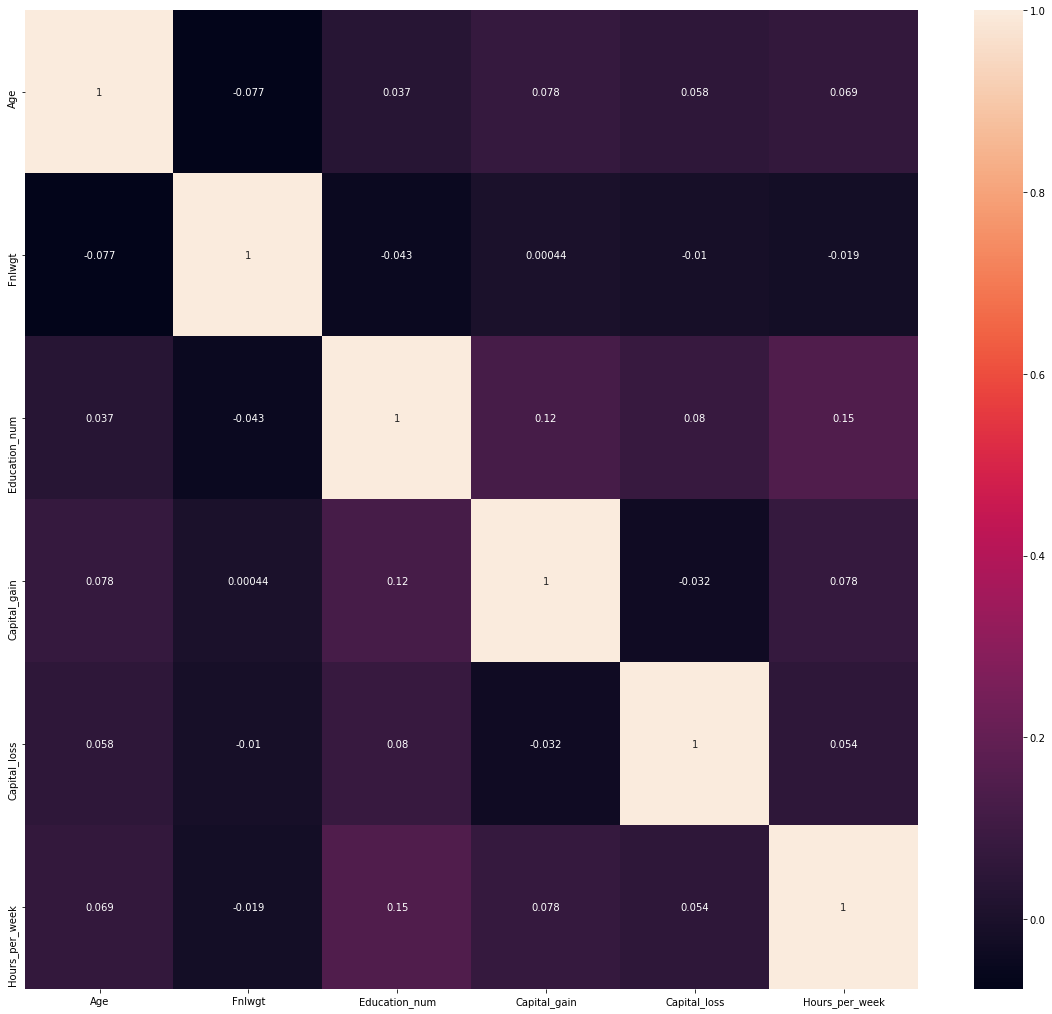

In [170]:
corr_hmap=df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Statistical Summary:

In [169]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Encoding:

We are using Label Encoder to convert all the categorical values into numeric

In [171]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d=df.columns
for i in d:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

In [172]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [173]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

### Removing Outliers:

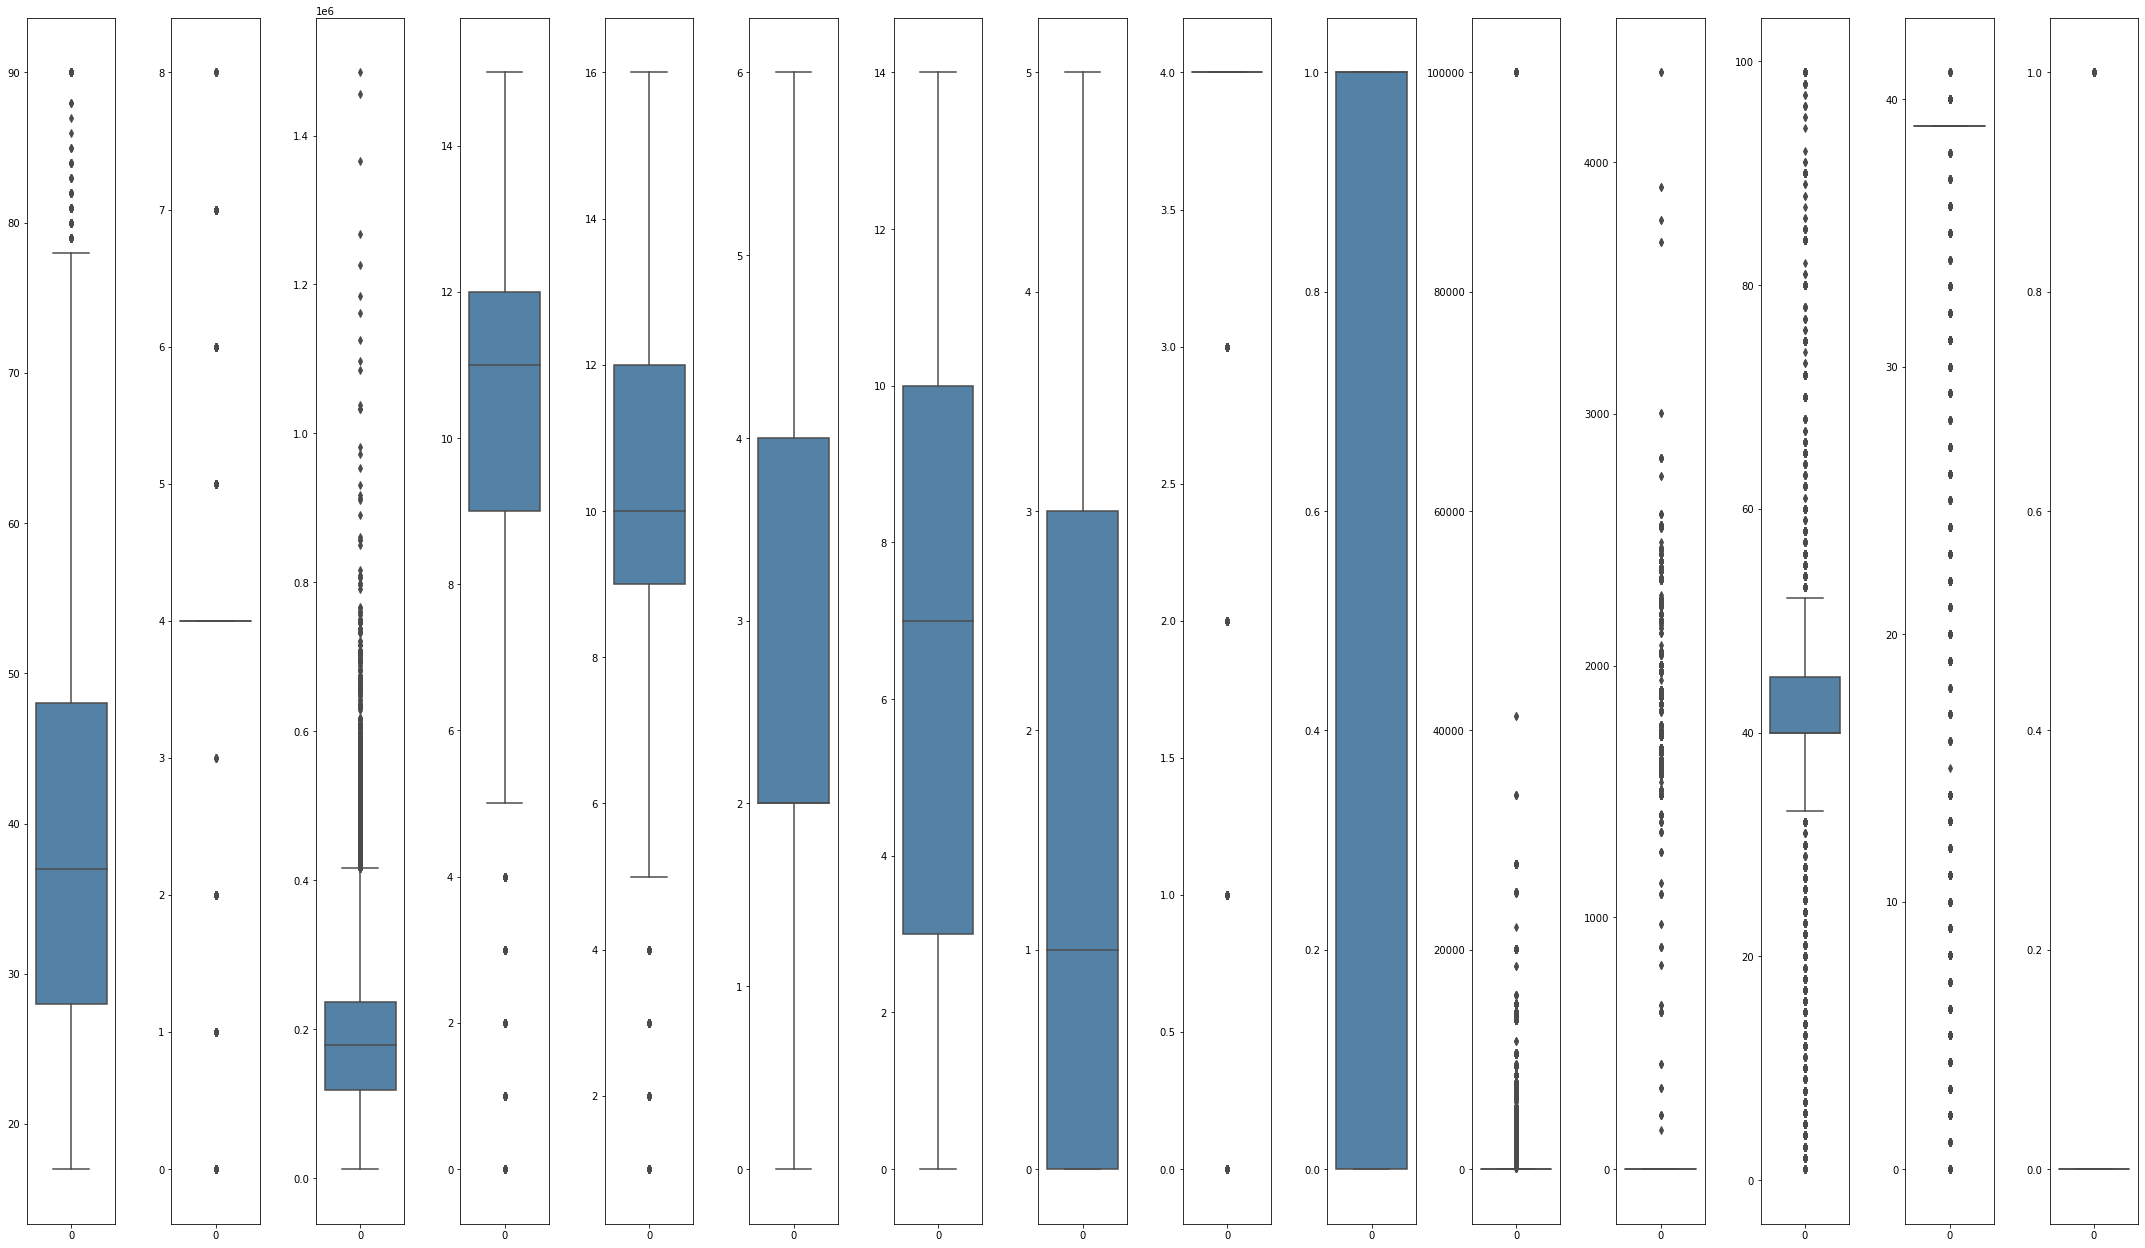

In [174]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='steelblue',orient='v')
    plt.tight_layout()

Using zscore, the outliers are removed from the dataframe. created new dataframe with no null values present in it.

In [175]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [176]:
new_df=df[(z<3).all(axis=1)]

In [177]:
new_df.shape

(27417, 15)

In [178]:
df.shape

(32560, 15)

In [179]:
''' Data Loss '''

Data_loss = ((32560-27417)/32560)*100
Data_loss

15.795454545454547

The loss of data after removing the ouliers is 15.795%.

### Skewness:

In [180]:
new_df.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

Plotting the distribution plot for new dataframe to see the distribution as well as skewness present in the dataset.

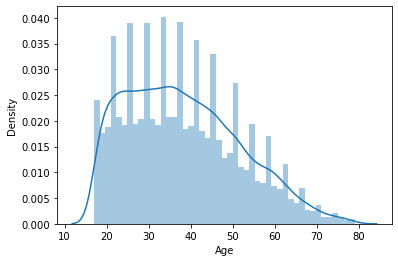

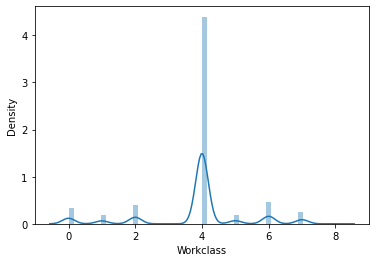

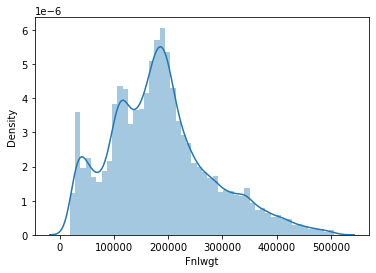

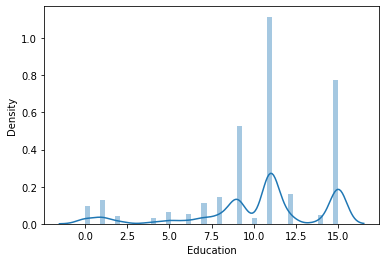

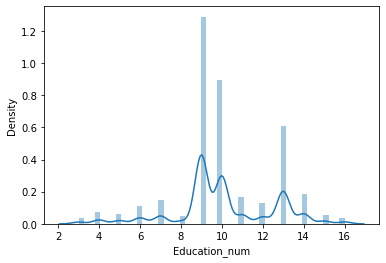

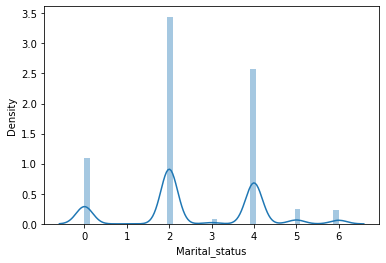

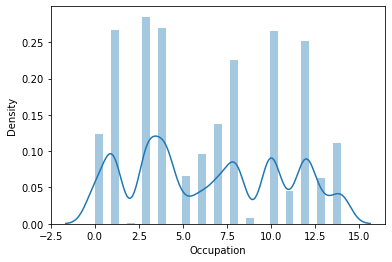

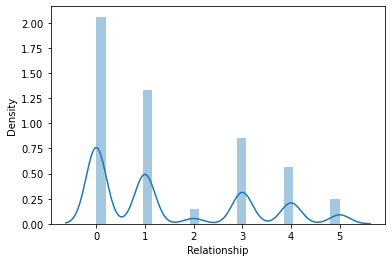

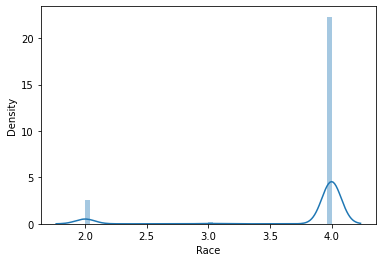

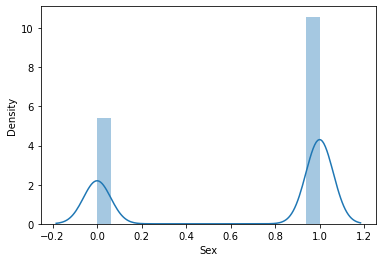

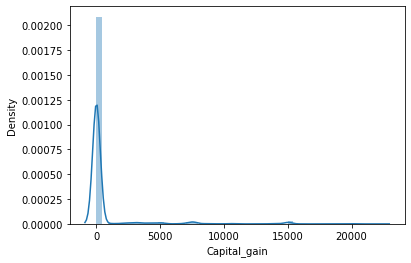

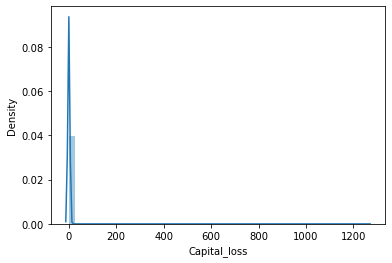

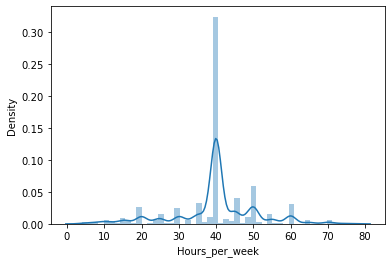

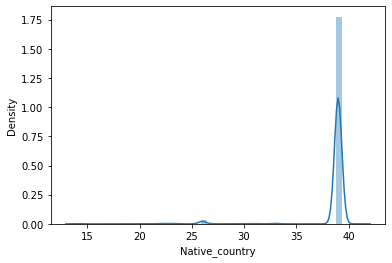

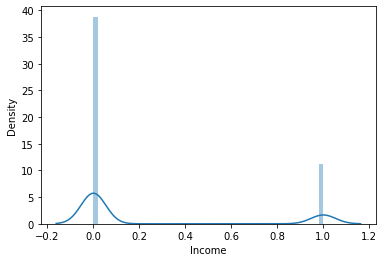

In [181]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

Histogram : to see the numeric data distribution.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>],
       [<AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <A

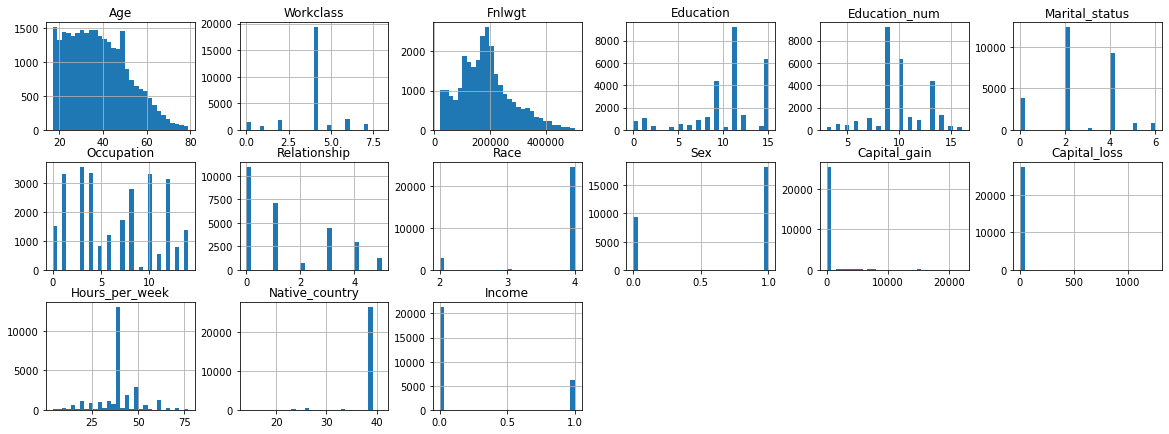

In [182]:
new_df.hist(figsize=(20,20), grid = True, layout = (8,6), bins = 30)

### Removing Skewness:

In [183]:
from scipy.stats import boxcox
for i in new_df.columns:
    if new_df.skew().loc[i]<-0.55:
        new_df[i]=np.square(new_df[i])

In [184]:
new_df.skew()

Age                0.483478
Workclass          1.236924
Fnlwgt             0.626221
Education          0.140099
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.577741
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.136704
Income             1.324919
dtype: float64

In [187]:
''' We are converting the Capital_loss column using LabelEncoder as we are not able to remove the skewness of this columns '''

new_df['Capital_loss']=le.fit_transform(new_df['Capital_loss'])

### Spliting the data into Feature and Target:

In [188]:
x=new_df.drop(('Income'), axis=1)
y=new_df['Income']

In [189]:
x.shape

(27417, 14)

In [190]:
y.shape

(27417,)

In [191]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,36,83311,81,13,2,4,0,16,1,0,0,13,1521
1,38,16,215646,121,9,0,6,1,16,1,0,0,40,1521
2,53,16,234721,1,7,2,6,0,4,1,0,0,40,1521
4,37,16,284582,144,14,2,4,5,16,0,0,0,40,1521
5,49,16,160187,36,5,3,8,1,4,0,0,0,16,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,16,257302,49,12,2,13,5,16,0,0,0,38,1521
32556,40,16,154374,121,9,2,7,0,16,1,0,0,40,1521
32557,58,16,151910,121,9,6,1,4,16,0,0,0,40,1521
32558,22,16,201490,121,9,4,1,3,16,1,0,0,20,1521


In [192]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27417, dtype: int32

### Scalling:

In [193]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [194]:
x.shape

(27417, 14)

In [195]:
y.shape

(27417,)

In [196]:
# importing all the required libraries

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [198]:
lc=LogisticRegression()
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lc.fit(x_train,y_train)
    pred=lc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu," on Random_state",maxRS)

Best Accuracy is 0.8400802334062728  on Random_state 37


### Train Test Split the data:

Train Test Split the data:
We got the Best Accuracy is 0.8400802334062728  on Random_state 37. Hence, using these values we are going to train our data using following models :-

> Logostic Regression

> Decision Tree Classifier

> Random Forest Classifier

> GaussianNB

> KNeighbors Classifier

> Gradient Boosting Classifier

> SVC

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=37)

In [201]:
x_train.shape

(20562, 14)

In [202]:
x_test.shape

(6855, 14)

In [203]:
y_train.shape

(20562,)

In [204]:
y_test.shape

(6855,)

In [205]:
# Logistic Regression

lc=LogisticRegression()
lc.fit(x_train,y_train)
pred=lc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 84.07002188183807%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[5125  266]
 [ 826  638]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5391
           1       0.71      0.44      0.54      1464

    accuracy                           0.84      6855
   macro avg       0.78      0.69      0.72      6855
weighted avg       0.83      0.84      0.83      6855



In [206]:
#Decision Tree Classifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 81.2837345003647%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[4701  690]
 [ 593  871]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      5391
           1       0.56      0.59      0.58      1464

    accuracy                           0.81      6855
   macro avg       0.72      0.73      0.73      6855
weighted avg       0.82      0.81      0.81      6855



In [207]:
#Random Forest Classifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 85.1495258935084%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[4972  419]
 [ 599  865]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      5391
           1       0.67      0.59      0.63      1464

    accuracy                           0.85      6855
   macro avg       0.78      0.76      0.77      6855
weighted avg       0.85      0.85      0.85      6855



In [208]:
# GaussianNB

gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 79.00802334062728%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[4301 1090]
 [ 349 1115]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      5391
           1       0.51      0.76      0.61      1464

    accuracy                           0.79      6855
   macro avg       0.72      0.78      0.73      6855
weighted avg       0.84      0.79      0.80      6855



In [209]:
# KNeighbors Classifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 83.41356673960613%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[4862  529]
 [ 608  856]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      5391
           1       0.62      0.58      0.60      1464

    accuracy                           0.83      6855
   macro avg       0.75      0.74      0.75      6855
weighted avg       0.83      0.83      0.83      6855



In [210]:
# Gradient Boosting Classifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 87.16265499635303%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[5129  262]
 [ 618  846]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5391
           1       0.76      0.58      0.66      1464

    accuracy                           0.87      6855
   macro avg       0.83      0.76      0.79      6855
weighted avg       0.86      0.87      0.86      6855



In [211]:
# SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc*100}%")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

Accuracy Score: 85.93727206418671%
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[5153  238]
 [ 726  738]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      5391
           1       0.76      0.50      0.60      1464

    accuracy                           0.86      6855
   macro avg       0.82      0.73      0.76      6855
weighted avg       0.85      0.86      0.85      6855



### Cross Validation:

In [212]:
cv=cross_val_score(lc,x,y,cv=5).mean()
print("Cross Validation Score for Logistic Regression is : ",cv)

Cross Validation Score for Logistic Regression is :  0.8293031654235831


In [213]:
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Classifier is : ",cvdt)

Cross Validation Score for Decision Tree Classifier is :  0.8057774025490632


In [214]:
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Classifier is : ",cvrf)

Cross Validation Score for Random Forest Classifier is :  0.8517710267649109


In [215]:
cvgb=cross_val_score(gb,x,y,cv=5).mean()
print("Cross Validation Score for GaussianNB is : ",cvgb)

Cross Validation Score for GaussianNB is :  0.7918445156323644


In [217]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsClassifier is : ",cvknn)

Cross Validation Score for KNeighborsClassifier is :  0.8357591457343186


In [218]:
cvgbc=cross_val_score(gbc,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Classifier is : ",cvgbc)

Cross Validation Score for Gradient Boosting Classifier is :  0.863807321429688


In [219]:
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print("Cross Validation Score for SVC is : ",cvsvc)

Cross Validation Score for SVC is :  0.850093113213935


### Overfitting & Underfitting:

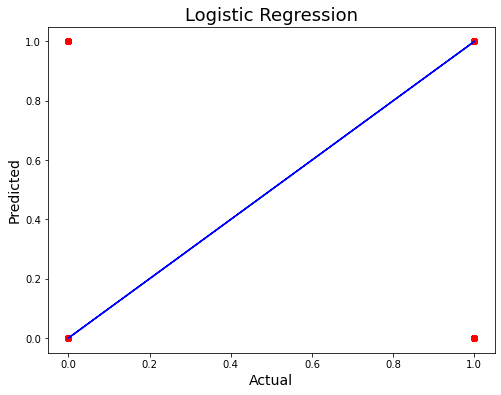

In [220]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting Decision Tree Classifier as our best model as it has least difference between it's Accuracy score and CV score.

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
parameter={'criterion':['gini', 'entropy'] ,
           'max_depth':np.arange(2,20), 
           'max_leaf_nodes':[1,2,3,4,5,6],
           'splitter':['best','random']}

In [223]:
GCV=GridSearchCV(dt,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [224]:
''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'splitter': 'best'}

In [225]:
census_final=DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=5, splitter='best')
census_final.fit(x_train,y_train)
pred=census_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.57257476294676


### We are getting the model accuracy and cross validation score both as 85.57% which shows our model is performing well.

### AUC - ROC Curve:

>>AUC Curve - A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

>>ROC Curves - It summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

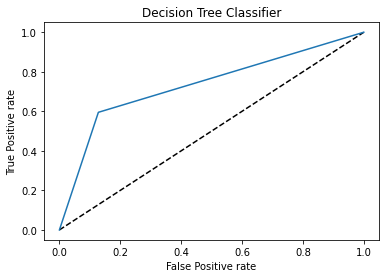

0.7334771294598467


In [226]:
y_pred_proba= dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtr')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Decision Tree Classifier')
plt.show()

# Getting the AUC score
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

### Saving the model:

In [227]:
import joblib
joblib.dump(census_final,"Census(submission).pkl")

['Census(submission).pkl']

In [228]:
census_model = joblib.load(open('Census(submission).pkl','rb'))
result = census_model.score(x_test,y_test)
print(result)

0.8557257476294675


In [230]:
Conclusion = pd.DataFrame([census_model.predict(x_test)[:],dt.predict(x_test)[:]],index=["Predicted","Original"])

In [231]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854
Predicted,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
Original,1,1,0,0,0,1,0,1,0,0,...,0,1,1,0,1,0,0,0,1,1


                                                     ---- --:-- ----